In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
from nltk.corpus import words

# Download the NLTK words dataset if not already downloaded
nltk.download('words')

# Get the list of words from NLTK's words corpus
word_list = words.words()

# Calculate the total number of words
total_words = len(word_list)

print("Total number of words in NLTK's words corpus:", total_words)


Total number of words in NLTK's words corpus: 236736


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import re


In [4]:
# Load the dataset
df = pd.read_csv('/content/amazon_reviews.csv')  # Replace 'your_dataset.csv' with the actual dataset file path

df['reviewText'] = df['reviewText'].astype(str)

# Testing the preprocess function.

In [5]:


def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits while preserving spaces
    text = ''.join([char if char not in string.punctuation and not char.isdigit() else ' ' for char in text])
    # Tokenize the text using a regular expression to capture words
    #tokens = re.findall(r'\b\w+\b', text)
    tokens = nltk.word_tokenize(text)
    # Remove stopwords

    tokens = [word for word in tokens if word not in stopwords.words('english')]
    #Keep the words that are actually english words and remove the noisy words like "aac"
    tokens = [word for word in tokens if word in word_list]
    return ' '.join(tokens)

# Apply text preprocessing to the 'review' column
df['reviewText'] = df['reviewText'].apply(preprocess_text)

2. Representation of Texts: word vectors (40 points)

1) Count-based word vectors with co-occurrence matrix

In [6]:
def get_vocab(corpus):
    # Create a list of words from the tokenized corpus
    #all_words = [word for review in corpus for word in review.split()]
    all_words = [word for review in corpus for word in review.split() if word.strip()]
    # Get distinct words by converting the list to a set (removes duplicates) and then back to a sorted list
    corpus_words = sorted(list(set(all_words)))

    return corpus_words


In [7]:
# Apply the get_vocab function to the training data
corpus = df['reviewText']
corpus_words = get_vocab(corpus)

# Print the first 20 words in the sorted vocabulary
print("Vocabulary (first 20 words):", corpus_words[:])

# Print the total number of distinct words in the vocabulary
print("Total number of distinct words:", len(corpus_words))


Vocabulary (first 20 words): ['ability', 'able', 'abroad', 'abruptly', 'absolute', 'absolutely', 'abuse', 'abysmal', 'accept', 'acceptable', 'acceptably', 'accepted', 'access', 'accessible', 'accessory', 'accident', 'accidentally', 'accidently', 'accommodate', 'accomplish', 'accord', 'according', 'accordingly', 'account', 'accurate', 'ace', 'achieve', 'acknowledge', 'acknowledged', 'acquire', 'acquired', 'across', 'act', 'acting', 'action', 'active', 'activity', 'actual', 'actuality', 'actually', 'ad', 'adapt', 'adapter', 'adaptor', 'add', 'added', 'addenda', 'addition', 'additional', 'additionally', 'address', 'adequate', 'adequately', 'adjust', 'admiral', 'admit', 'admitted', 'admittedly', 'adopter', 'adult', 'advance', 'advanced', 'advancing', 'advantage', 'adventure', 'advertise', 'advertisement', 'advertising', 'advice', 'advise', 'advised', 'aerobic', 'affect', 'affected', 'affecting', 'afford', 'affordable', 'afraid', 'aft', 'afternoon', 'afterward', 'afterwards', 'age', 'agent'

In [8]:
import numpy as np

def compute_co_occurrence_matrix(corpus_words, corpus, window_size=4):
    word2index = {word: index for index, word in enumerate(corpus_words)}
    vocab_size = len(corpus_words)

    # Initialize the co-occurrence matrix with zeros
    M = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for review_tokens in corpus:
        for center_index, center_word in enumerate(review_tokens):
            center_word_index = word2index.get(center_word)
            if center_word_index is not None:
                left_boundary = max(0, center_index - window_size)
                right_boundary = min(len(review_tokens), center_index + window_size + 1)

                context_indices = [word2index.get(review_tokens[i]) for i in range(left_boundary, right_boundary) if i != center_index]
                context_indices = [i for i in context_indices if i is not None]

                for context_index in context_indices:
                    M[center_word_index, context_index] += 1

    return M, word2index


In [9]:


# Call the compute_co_occurrence_matrix function
M, word2index = compute_co_occurrence_matrix(corpus_words, corpus, window_size=4)

# Print the co-occurrence matrix and word2index dictionary (for demonstration purposes)
print("Co-occurrence Matrix:")
print(M)
print("\nWord to Index Dictionary:")
print(word2index)


Co-occurrence Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Word to Index Dictionary:
{'ability': 0, 'able': 1, 'abroad': 2, 'abruptly': 3, 'absolute': 4, 'absolutely': 5, 'abuse': 6, 'abysmal': 7, 'accept': 8, 'acceptable': 9, 'acceptably': 10, 'accepted': 11, 'access': 12, 'accessible': 13, 'accessory': 14, 'accident': 15, 'accidentally': 16, 'accidently': 17, 'accommodate': 18, 'accomplish': 19, 'accord': 20, 'according': 21, 'accordingly': 22, 'account': 23, 'accurate': 24, 'ace': 25, 'achieve': 26, 'acknowledge': 27, 'acknowledged': 28, 'acquire': 29, 'acquired': 30, 'across': 31, 'act': 32, 'acting': 33, 'action': 34, 'active': 35, 'activity': 36, 'actual': 37, 'actuality': 38, 'actually': 39, 'ad': 40, 'adapt': 41, 'adapter': 42, 'adaptor': 43, 'add': 44, 'added': 45, 'addenda': 46, 'addition': 47, 'additional': 48, 'additionally': 49, 'address': 50, 'adequate': 51, 'adequately': 52, 'adjust': 53,

In [10]:
# Assuming M is your co-occurrence matrix
if np.all(M == 0):
    print("The co-occurrence matrix M is empty (contains all zeros).")
else:
    print("The co-occurrence matrix M is not empty.")


The co-occurrence matrix M is not empty.


In [11]:
import numpy as np

# Assuming M is your co-occurrence matrix
non_zero_values = M[M != 0]

# Now, non_zero_values contains all values from M that are not equal to 0
print(non_zero_values)


[  502  1307  6304   261  1689  1260   100   833  4490  1598  1097    20
  2526  2429   194   309   115    43  1307  3460 19782  1766  2058  2729
    37  1996  6528  5757  5640   311 15540  5460  1187   951   658   112
  6304 19782 36014  8029 10075  8366   149  4171 22096 25062 17838   606
 39221  9901  9295  7589  2710   681   261  1766  8029  1136   803   567
    10   637  3355  3131  1087    30  6049  1993   230   474   157    58
  1689  2058 10075   803  2100  4533    20  1596  4392  7291  1898    83
  7738  3276   778  1035  1188   202  1260  2729  8366   567  4533  1798
     9   754  2382  5552  3958    45  3813  3423   409  1562   173    31
   100    37   149    10    20     9    30    49    75    27     1    67
    50     5    14     4     1   833  1996  4171   637  1596   754    30
   136  2006  2035  1071   279  4479   924   144  3783    54     7  4490
  6528 22096  3355  4392  2382    49  2006 11194  5467  4280   390  8282
  6132  1502  4432  1785   151  1598  5757 25062  3

In [12]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M):
    # Initialize TruncatedSVD with the desired number of components (k)
    svd = TruncatedSVD(n_iter=10, random_state=42)

    # Fit and transform the co-occurrence matrix M
    M_reduced = svd.fit_transform(M)

    return M_reduced


In [13]:
M_reduced = reduce_to_k_dim(M)

In [14]:
import numpy as np

# Assuming M is your co-occurrence matrix
non_zero_values = M_reduced[M_reduced != 0]

# Now, non_zero_values contains all values from M that are not equal to 0
print(non_zero_values)

[ 8.49206127e+03 -1.14940032e+03  2.75253658e+04  3.52139801e+02
  7.04152397e+04  1.54277751e+04  1.12074148e+04  1.36540383e+02
  1.61813345e+04  1.51394862e+03  1.28398036e+04 -8.02005787e+02
  2.03087800e+02 -1.94685389e+01  7.61988558e+03  9.95762651e+02
  2.88749998e+04 -5.06440305e+03  3.03580181e+04 -6.87301670e+03
  2.23839703e+04 -3.24763406e+03  8.80954948e+02 -2.01231035e+02
  4.61429821e+04 -1.45518999e+04  1.64672724e+04  8.06576096e+02
  9.21325484e+03 -3.31882232e+03  1.12491163e+04  8.23428063e+02
  3.47816526e+03 -6.22634934e+02  7.38497382e+02 -2.33697179e+02]


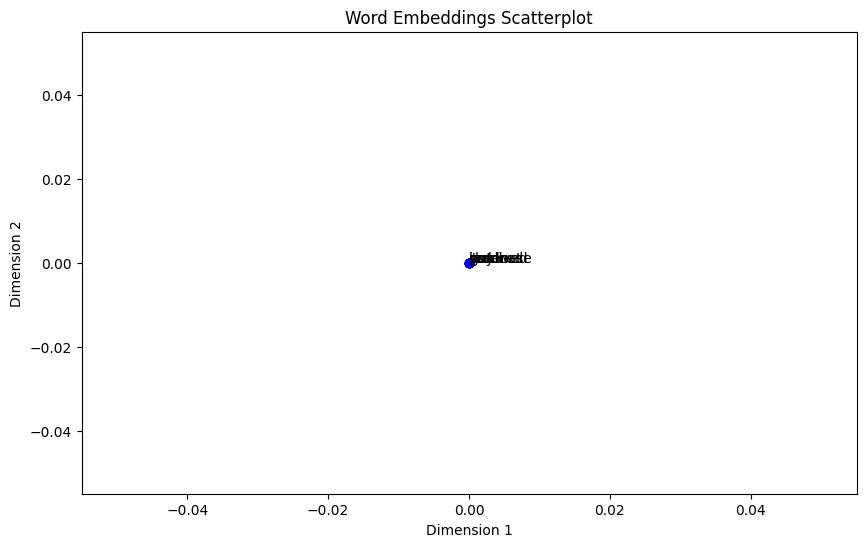

In [15]:
import matplotlib.pyplot as plt

def plot_embeddings(M_reduced, word2index, words_to_plot):
    # Get indices of words to plot
    word_indices = [word2index[word] for word in words_to_plot if word in word2index]

    # Extract the reduced embeddings for the specified words
    word_embeddings = M_reduced[word_indices]

    # Create a scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(word_embeddings[:, 0], word_embeddings[:, 1], marker='o', color='b', alpha=1.0)

    # Annotate the points with the word labels
    for i, word in enumerate(words_to_plot):
        plt.annotate(word, (word_embeddings[i, 0], word_embeddings[i, 1]))

    # Set plot labels
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Word Embeddings Scatterplot')

    # Show the plot
    plt.show()

# Example usage with the specified words
words_to_plot = ['purchase', 'buy', 'work', 'got', 'ordered', 'received', 'product', 'item', 'deal', 'use']
plot_embeddings(M_reduced, word2index, words_to_plot)


In [16]:
def load_embedding_model():
    """ Load GloVe Vectors
    Return:
    wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin
    # -----------------------------------
    # Run Cell to Load Word Vectors
    # Note: This will take a couple minutes
    # -----------------------------------
wv_from_bin = load_embedding_model()

Loaded vocab size 400000


In [17]:
def get_matrix_of_vectors(wv_from_bin, corpus_words):
    """ Put the GloVe vectors into a matrix M.
    Param:
    wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
    Return:
    M: numpy matrix shape (num words, 200) containing the vectors
    word2ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.seed(225)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2ind and matrix M..." % len(words))
    word2ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in corpus_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2ind


In [18]:
M2, word2ind = get_matrix_of_vectors(wv_from_bin, corpus_words)

Shuffling words ...
Putting 10000 words into word2ind and matrix M...
Done.


In [19]:
M2_reduced = reduce_to_k_dim(M2)

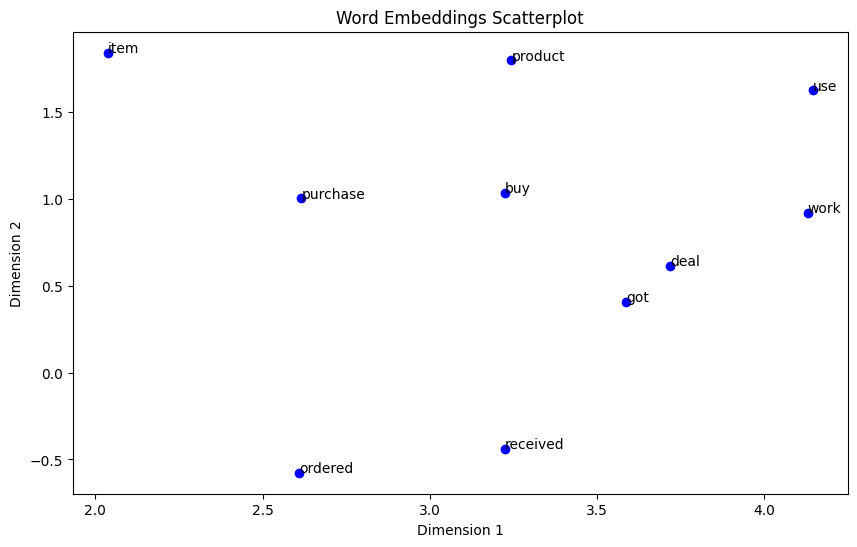

In [20]:
words_to_plot = ['purchase', 'buy', 'work', 'got', 'ordered', 'received', 'product', 'item', 'deal', 'use']
plot_embeddings(M2_reduced, word2ind, words_to_plot)

In [21]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M):
    # Initialize TruncatedSVD with the desired number of components (k)
    svd = TruncatedSVD(n_components = 128, n_iter=10, random_state=42)

    # Fit and transform the co-occurrence matrix M
    M_reduced = svd.fit_transform(M)

    return M_reduced

In [22]:
M3_reduced = reduce_to_k_dim(M2)

In [23]:
def calculate_review_embedding(tokens, word_embeddings, word2ind):


    # Initialize an array to store the word embeddings for the tokens in the review
    review_word_embeddings = []

    # Iterate through the tokens in the review
    for token in tokens:
        # Check if the token is in the word2ind dictionary
        if token in word2ind:
            # Get the index of the token in the word2ind dictionary
            index = word2ind[token]
            # Get the corresponding word embedding from word_embeddings
            word_embedding = word_embeddings[index]
            # Append the word embedding to the review_word_embeddings array
            review_word_embeddings.append(word_embedding)

    # Calculate the average of the word embeddings for the review
    if len(review_word_embeddings) > 0:
        review_embedding = np.mean(review_word_embeddings, axis=0)
    else:
        review_embedding = np.zeros(word_embeddings.shape[1])  # Use zeros if no valid embeddings found

    return review_embedding


In [24]:
# Initialize an array to store the review embeddings
review_embeddings = []

# Iterate through the reviews in your dataset
for review in corpus:  # Replace with the actual variable name for your reviews
    # Calculate the review embedding for the current review
    review_embedding = calculate_review_embedding(review, M3_reduced, word2ind)
    # Append the review embedding to the review_embeddings array
    review_embeddings.append(review_embedding)

# Convert the review_embeddings array to a numpy array
review_embeddings = np.array(review_embeddings)


In [25]:
review_embeddings.shape


(4915, 128)

In [26]:
new_df = pd.concat([df, pd.DataFrame(review_embeddings)], axis=1)

In [27]:
new_df.shape

(4915, 130)

In [28]:
df.shape

(4915, 2)

In [29]:
new_df.columns = new_df.columns.astype(str)



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier

features = new_df.drop(columns=['overall', 'reviewText'])

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, new_df['overall'], test_size=0.2, random_state=42, stratify=df['overall'])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)






In [31]:
# Create and train the logistic regression model
logistic_model = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = logistic_model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')
roc_auc = roc_auc_score(y_val, logistic_model.predict_proba(X_val), multi_class='ovr')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.7983706720977597
Precision: 0.6373957300658285
Recall: 0.7983706720977597
F1 Score: 0.70885912448997
ROC AUC: 0.589288453561008


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.neural_network import MLPClassifier

# Create and train the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = nn_model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')
roc_auc = roc_auc_score(y_val, nn_model.predict_proba(X_val), multi_class='ovr')

# Print evaluation metrics
print("Neural Network Model - Validation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Neural Network Model - Validation Metrics:
Accuracy: 0.7596741344195519
Precision: 0.6671348765801863
Recall: 0.7596741344195519
F1 Score: 0.7049248408894451
ROC AUC: 0.6703243887843356


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Neural-Network has performed well in the sense of ROC but the Logistic had better accuracy, Later when we tested our test data on Logistic it improved results in ROC as well.

In [33]:
# Predict on the test set
y_test_pred = logistic_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test), multi_class='ovr')

# Print evaluation metrics
print("Test Metrics for Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Test Metrics for Logistic Regression Model:
Accuracy: 0.7967479674796748
Precision: 0.6348073236829929
Recall: 0.7967479674796748
F1 Score: 0.7066181069050509
ROC AUC: 0.600020413469126


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
